In [2]:
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
from typing import Dict, List, Tuple
import torch

In [3]:
import sys
import os

app = "/app"
if app not in sys.path:
    sys.path.append(app)

In [5]:
from src.comparator import Comparator
from src.embed import OpenAIEmbedder, SBERTEmbedder
from src.preprint import Preprint
from src.review_process import ReviewProcess
from src.utils import split_paragraphs, split_sentences
from src.config import config

In [101]:
embedder = SBERTEmbedder()
# embedder = OpenAIEmbedder()

In [80]:
# doi = "10.1101/2021.05.12.443743"
doi = "10.1101/2021.07.31.454568"

In [81]:
preprint = Preprint(doi=doi)

In [82]:
review_process = ReviewProcess(doi=doi)

In [102]:
preprint_chunks = preprint.get_chunks(split_sentences, "results")

In [103]:
review_chunks = review_process.reviews[0].get_chunks(split_sentences)

In [104]:
print(f"preprint chunks: {len(preprint_chunks)}; review chunks: {len(review_chunks)}")

preprint chunks: 205; review chunks: 19


In [105]:
comp = Comparator(embedder)

In [117]:
similarity_matrix = comp.compare_dot(preprint_chunks, preprint_chunks) #review_chunks)

In [118]:
similarity_matrix.size()

torch.Size([205, 205])

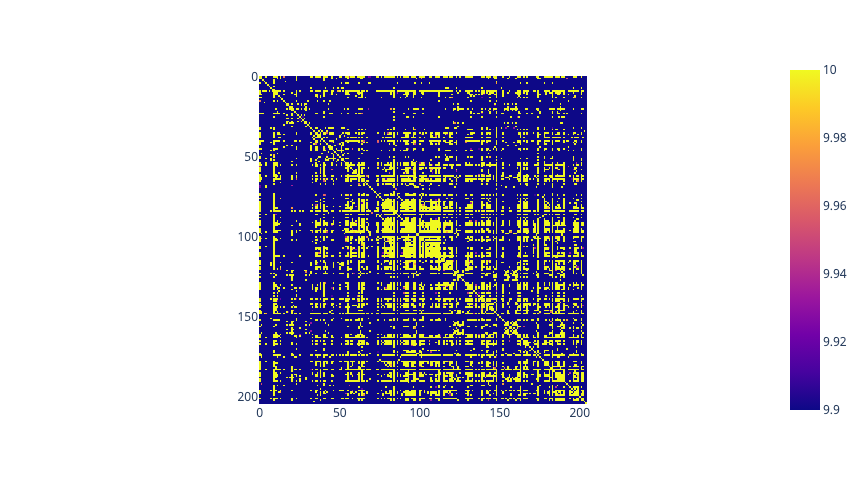

In [119]:
fig = px.imshow(
    torch.clamp(similarity_matrix, 9.9, 10)
)
fig.update_layout(
    height=500,
    width=500
        )
fig.show()

In [68]:
for i, p in enumerate(preprint_chunks):
    print(i, p[:80])

0 To improve our understanding of Arctic algal evolution and adaptive diversity, g
1 The four species are distantly related to each other (Fig. 1): Baffinella sp.
2 CCMP2298, a chrysophyte from sea ice; and a novel pelagophyte species CCMP2097 f
3 All four species have been demonstrated to grow optimally at low temperatures (<
4 Scatterplot of sampled latitude, and growth temperatures, of all geolocalised al
5 Data were manually verified for each culture by comparing the synthesis of the g
6 Keeling et al., 2014) with recorded permissible growth temperatures for each cor
7 Tara Oceans data is taken from PANGAEA entries for each station (Pesant et al., 
8 Growth temperatures are provided as ranges, centred around the experimental temp
9 The Arctic species sequenced in this study, which are not viable at temperatures
10 Phylogenetic contexts of the sequenced Arctic algae were assessed through a conc
11 CCMP2293 was resolved in an 18S analysis to a well-supported clade containing th
12 1-

In [116]:
for i, p in enumerate(review_chunks):
    print(i, p)

0 This preprint has been reviewed by subject experts for *Review Commons*.
1 -----


### Referee \#1

#### Evidence, reproducibility and clarity

 
2 The authors have assembled an enormous amount of statistical data on the genomes and phylogeny of Arctic algae, including the genomes of four new species that they sequenced for this study.
3 Their main finding is that horizontal gene transfer has led to convergent evolution in distantly related microalgae. 


4 The purpose of the study is not clearly stated in the abstract or the introduction.
5 The authors say (line 93) 'Defining the genetic adaptations underpinning these small algal species is crucial as a baseline to understand their response to anthropogenic global change (Notz & Stroeve,2016).'  
6 The authors state (line 103) 'We extend &lt;previous findings&gt; by sequencing the genomes of four distantly related microalgae...'.
7 I am sure the authors can provide a more compelling reason to embark on such a labor-intensive study.
